### Bootstrapping, Multinomial Weights and Bayesian Bootstrapping

...

jupyter nbconvert --to html wip_bayesian_bootstrapping.ipynb 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Generating Data 

Generating sample data to be bootstrapped, which is assumed here to follow standard normal distribution.

In [2]:
np.random.seed(42)  # For reproducibility

ndata = 10000
data = np.random.normal(0, 1, size=ndata)
print(f"mean:{np.mean(data):0.2f}, std:{np.std(data):0.2f}, sample_size:{ndata}")

mean:-0.00, std:1.00, sample_size:10000


### Bootstrapping

In the classic bootstrap, we:

- have observed data that we
- resample (nboots times) with replacement and then like to 
- compute the statistic (mean, quantile, regression coefficient, etc.) on that resample.

In the below, for the simplicity of implementation, let's break down process of generating bootstrap into two steps.
- first, generate a list of random integers (indices) between 0 and ndata with replacement 
- second, apply it to the data to obtain bootstrapped samples.

In [42]:
# Number of bootstrap samples
nboots = 15000

# Create a default random number generator
rng = np.random.default_rng()

# Sample integers with replacement
# low=0 (inclusive), high=ndata (exclusive), size=num_samples
samples_indices = rng.integers(low=0, high=ndata, size=(ndata, nboots))
samples = data[samples_indices]

print(f"Data mean:{np.mean(data):0.2f}, std:{np.std(data):0.2f}, sample_size:{ndata}")
print(f"Bootstrapped sample mean: {np.mean(samples, axis=0).mean():0.2f}, "
      f"std: {np.std(samples, axis=0).mean():0.2f}, bootstrap_size:{nboots}")

Data mean:-0.00, std:1.00, sample_size:10000
Bootstrapped sample mean: -0.00, std: 1.00, bootstrap_size:15000


When we flatten the *samples_indices* matrix above and plot its histogram, we should expect to see indices are uniformly distributed.

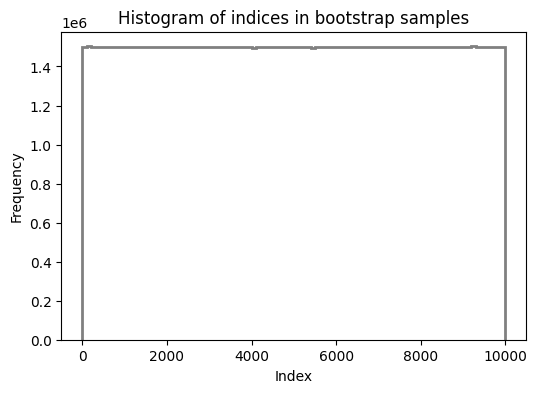

In [43]:
plt.figure(figsize=(6 ,4))
_ = plt.hist(samples_indices.flatten(), bins=100, histtype='step', lw=2, color='gray')
plt.xlabel("Index")
plt.ylabel("Frequency")
plt.title("Histogram of indices in bootstrap samples")
plt.show()

However, interestingly if we count how many times any particular index has repeated over each column or replica, it seems to follow a multinomial distribution as shown below for a couple of example indices.

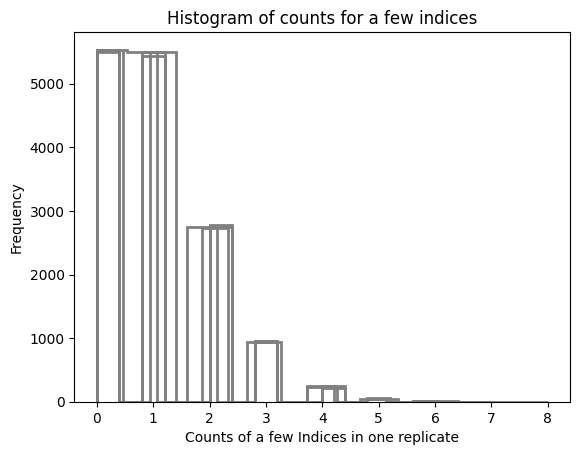

In [44]:
# Compute counts per replicate for say index = 750
# Aka how many times does 750 index appear in each bootstrap sample

for index in [5, 500, 1750, 5000]:
    counts_cat = np.sum(samples_indices==index, axis=0)
    plt.hist(counts_cat, histtype='step', lw=2, color='gray', bins=15)

plt.xlabel("Counts of a few Indices in one replicate")
plt.ylabel("Frequency")
plt.title("Histogram of counts for a few indices")
plt.show()

Above we can see that the counts of indices in bootstrap samples are not uniform, 
which is expected since some indices will be sampled more frequently than others due to the nature of sampling with replacement.
Basically, almost all indices have been most sampled once or never and as many times as 6 or even 7.

Next, let's change these weights from multinomial (discrete) to something more interesting, perhaps a continuous weight.


In [75]:
np.random.dirichlet([1]*ndata, nboots).T.sum(axis=0)

array([1., 1., 1., ..., 1., 1., 1.], shape=(15000,))

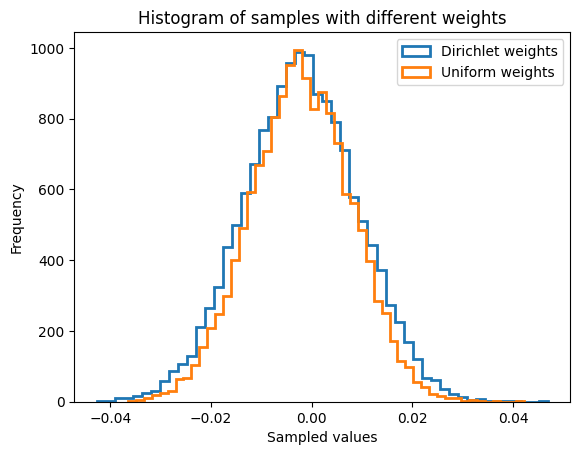

In [59]:
# Generate a single sample from a Dirichlet distribution
dirichilet_weights = np.random.dirichlet([4]*ndata, nboots).T

plt.hist(np.sum(samples * dirichilet_weights, axis=0), label='Dirichlet weights', histtype='step', lw=2, bins=50)
plt.hist(np.average(samples, axis=0), label='Uniform weights', histtype='step', lw=2, bins=50)
plt.xlabel("Sampled values")
plt.ylabel("Frequency")
plt.title("Histogram of samples with different weights")
plt.legend()
plt.show()

#### Reference

-  Matteo C. blog post on [Bayesian bootstrapping](https://matteo.ghilardi.io/bayesian_bootstrapping/).